In [13]:
#Import All Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

<AxesSubplot:>

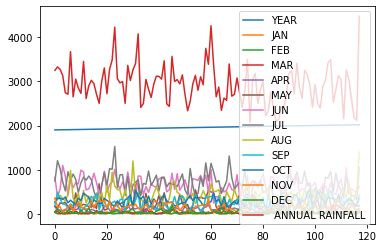

In [86]:
data = pd.read_csv('kerala.csv')
print(data)
data.plot()

In [15]:
data.isnull().sum() 

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [16]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [17]:
#Printing the clean data
data.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [63]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14].values
y=data.iloc[:,-1].values


array([1913. ,    3.1,    5.2,   20.7,   75.7,  198.8,  541.7,  763.2,
        247.2,  176.9,  422.5,  109.9,   45.8])

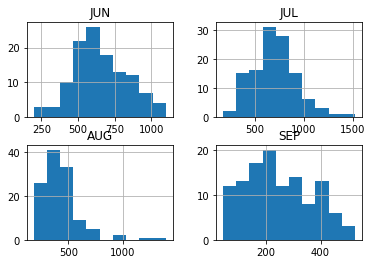

In [64]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

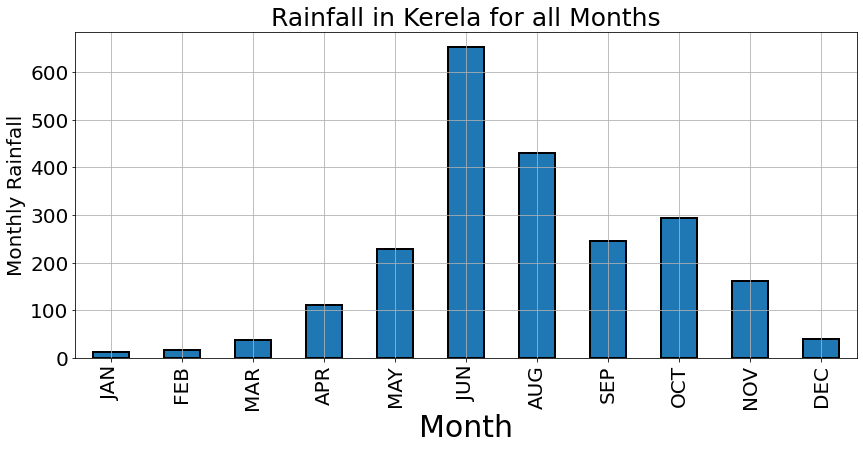

In [65]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

In [90]:
#Split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train[20]


array([1928. ,   12.7,   65.9,   51.3,  121.1,   81.9,  590.7,  420.6,
        553.2,   75.9,  321.5,  155.2,   52.7])

In [71]:
# type casting.
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [94]:
#Machine learning algorithm
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
Acc=dtc_clf.score(x_train,y_train)*100
print("Accuracy of ML Model Is:---",Acc)
pread=dtc_clf.predict([[2028. ,   12.7,   65.9,   51.3,  121.1,   81.9,  590.7,  420.6,
        553.2,   75.9,  321.5,  155.2,   52.7]])


Accuracy of ML Model Is:--- 100.0


In [92]:
if pread==1:
        print("- possibility of  severe flood")
else:
    print("- no chance of severe flood")

- no chance of severe flood
